In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
arcos_date = pd.read_csv('arcos_date.csv', nrows = 10000000)

In [5]:
arcos_date['Datetime'] = pd.to_datetime(arcos_date['TRANSACTION_DATE'].astype('str'), format = '%m%d%Y')

In [6]:
arcos_date['Year'] = arcos_date.Datetime.dt.year
arcos_date['Month'] = arcos_date.Datetime.dt.month
arcos_date['day-of-week'] = arcos_date.Datetime.dt.dayofweek

In [6]:
arcos_date.head()

,QUANTITY,TRANSACTION_DATE,Datetime,Year,Month,day
0,1.0,12262012,2012-12-26,2012,12,26
1,4.0,3112009,2009-03-11,2009,3,11
2,40.0,11252008,2008-11-25,2008,11,25
3,20.0,6122009,2009-06-12,2009,6,12
4,10.0,10022009,2009-10-02,2009,10,2


Text(0, 0.5, 'Quantity per Capita')

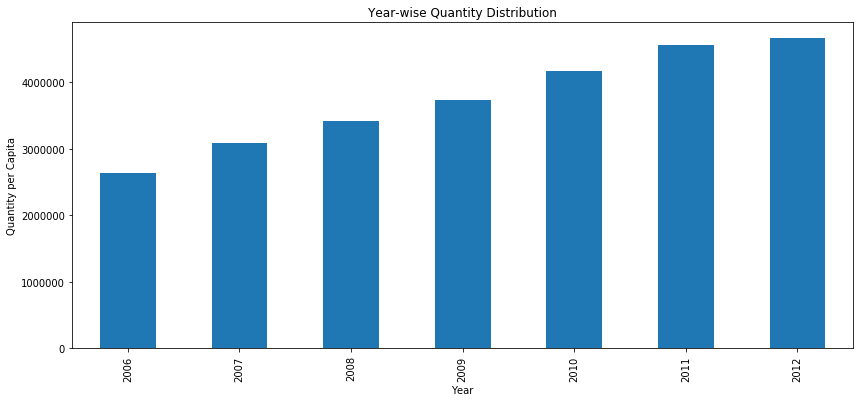

In [20]:
plt.figure(figsize = (14,6))
arcos_date.groupby('Year')['QUANTITY'].sum().plot.bar()
plt.title ('Year-wise Quantity Distribution')
plt.xlabel('Year')
plt.ylabel('Quantity per Capita')

Text(0, 0.5, 'Quantity per Capita')

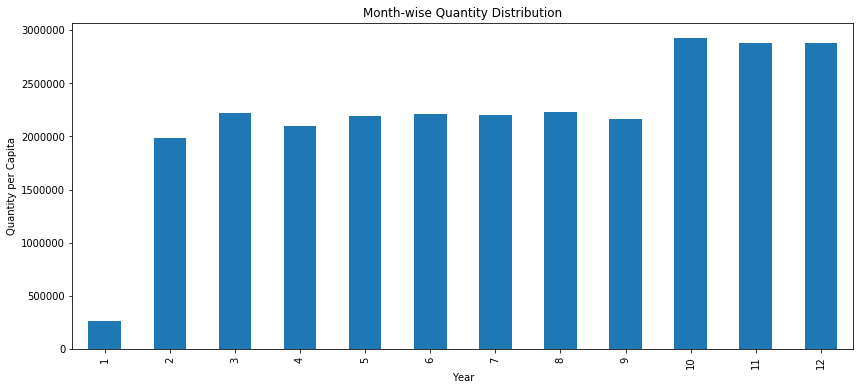

In [21]:
plt.figure(figsize = (14,6))
arcos_date.groupby('Month')['QUANTITY'].sum().plot.bar()
plt.title ('Month-wise Quantity Distribution')
plt.xlabel('Month')
plt.ylabel('Quantity per Capita')

Text(0, 0.5, 'Quantity per Capita')

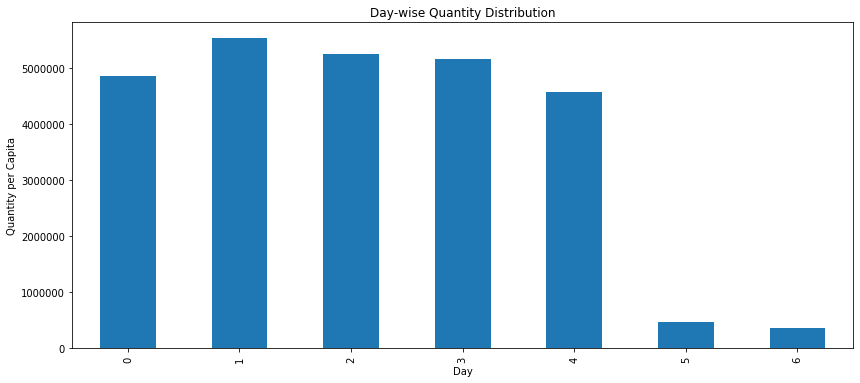

In [24]:
plt.figure(figsize = (14,6))
arcos_date.groupby('day-of-week')['QUANTITY'].sum().plot.bar()
plt.title ('Day-wise Quantity Distribution')
plt.xlabel('Day')
plt.ylabel('Quantity per Capita')

In [8]:
#To observe a daily count of quantity distributed we resampled data 
arcos_date.index = arcos_date.Datetime
resampled_daily = arcos_date.resample('D').sum()

In [28]:
resampled_daily.head()

,QUANTITY,TRANSACTION_DATE,Year,Month,day,day-of-week
Datetime,,,,,,
2006-01-10,9574.0,4748543854,8643854,4309,43090,4309
2006-01-11,0.0,0,0,0,0,0
2006-01-12,0.0,0,0,0,0,0
2006-01-13,0.0,0,0,0,0,0
2006-01-14,0.0,0,0,0,0,0


c:\users\gaura\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


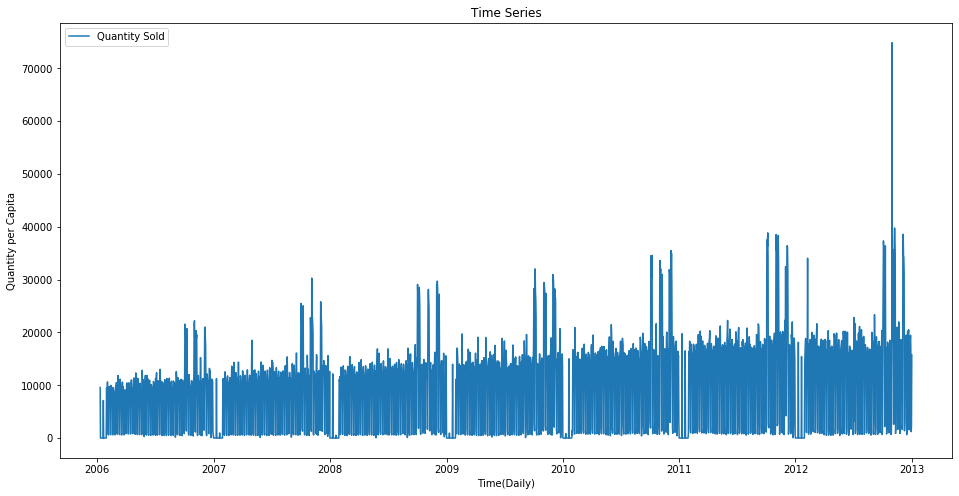

In [9]:
plt.figure(figsize = (16,8))
ts = resampled_daily.QUANTITY
plt.plot(ts, label = 'Quantity Sold')
plt.title ('Time Series')
plt.xlabel('Time(Daily)')
plt.ylabel('Quantity per Capita')
plt.legend(loc = 'best')